<a href="https://colab.research.google.com/github/sutanto5/DataScience-Exploration/blob/main/JS_MLScope_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing

In [112]:
# Fetch the dataset and request a DataFrame format
california = fetch_california_housing(as_frame=True)

# Get the full DataFrame directly from the dataset
df = california.frame

Ways to show the shape of your dataset

In [113]:
df.shape

(20640, 9)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [115]:
df.head(1000) # view dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
995,4.8624,11.0,5.680000,1.044706,5826.0,2.741647,37.71,-121.75,1.924
996,9.1531,25.0,5.811765,0.952941,254.0,2.988235,37.74,-121.77,4.188
997,4.7361,22.0,6.080220,1.036264,2474.0,2.718681,37.70,-121.80,2.168
998,5.4324,17.0,5.975831,0.965257,2222.0,3.356495,37.69,-121.80,2.155


In [116]:
df.columns # view columns
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [117]:
test = df.drop(columns=['Latitude',"Longitude","AveOccup"],inplace=False) # remove columns from your dataset, inplace=False returns a separate copy of the dataset while True modifies the dataset directly
test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,3.422


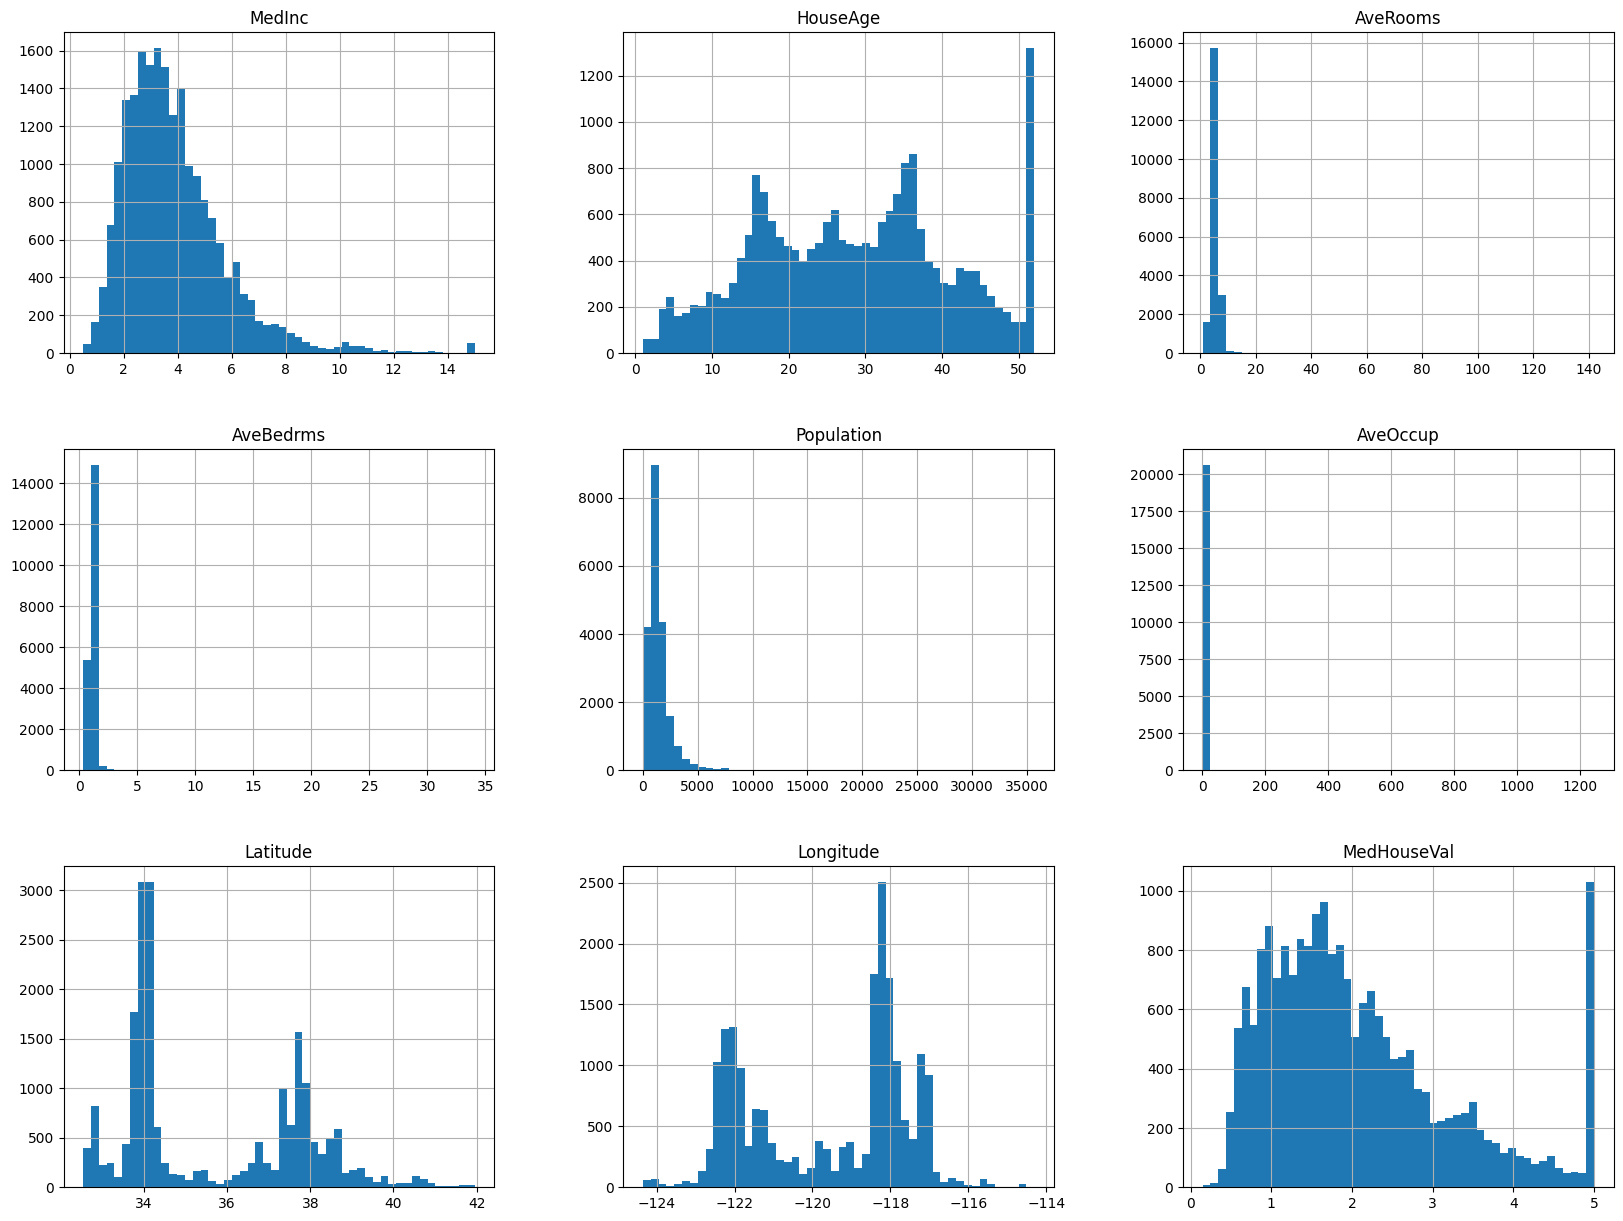

In [118]:
df.hist(bins=50, figsize=(20,15))
plt.show() #histogram ptsd

In [119]:
corr_matrix=df.corr() #shows how closely related two variables are

In [120]:
corr_matrix["MedHouseVal"].sort_values(ascending=False) #median income seems like its the most important

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


# **Data Cleaning**

In [121]:
#checks for null operators -> Results in 0 so no null vals
df.isnull().sum()

df.dropna(how = 'all') # drop na -> no na so nothig dropped, all will oly remove if row is na

df.shape #size of data set, 20640 entries 9 rows

(20640, 9)

<Axes: >

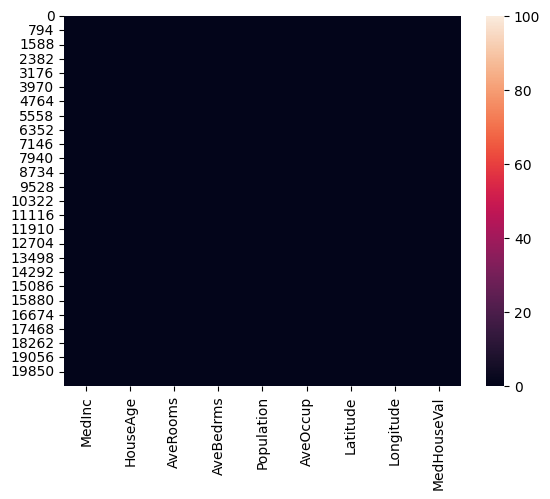

In [122]:
sns.heatmap(df.isnull(), vmin = 0.0, vmax = 100.0, xticklabels='auto', yticklabels='auto', annot=False)

Since they're all black that means the "null" or "Nan" appears 0 times I think

# **Training Model**

We will be training our model to predict themedian house value of  based on the geographical trends of the area



In [123]:
#we will first be using a linear regression to test our data
reg = LinearRegression()

#got rid of med house val because thats what we want to predict
X = df.drop(columns = ['MedHouseVal'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [124]:
#want to predict median house value
y = df['MedHouseVal']
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [125]:
#most common to split data into 80/20 split
#random_state randomizes the split '11' is the seed I think
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=11, test_size=0.2)

In [126]:
print(x_train.shape)
print(y_train.shape)
x_train.head()
x_train.describe()

(16512, 8)
(16512,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.856323,28.732437,5.427024,1.097891,1426.363251,3.091189,35.628591,-119.566822
std,1.898502,12.609133,2.597385,0.499879,1151.945583,11.463774,2.132263,2.004521
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.554350,18.000000,4.429182,1.006304,785.000000,2.428780,33.930000,-121.800000
50%,3.522200,29.000000,5.212290,1.048780,1165.000000,2.819087,34.250000,-118.490000
75%,4.730800,37.000000,6.045098,1.099050,1719.000000,3.287706,37.720000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [127]:
# fit model
reg.fit(x_train,y_train)

LinearRegression()

In [128]:
#display the intercept of the model
print(reg.intercept_) #distance y away from the origin
print("R_squared val: " + str(reg.score(x_train,y_train)))

-37.52785391522649
R_squared val: 0.6061334059992143


In [129]:
y_pred = reg.predict(x_test)
perf = pd.DataFrame({'PRED': y_pred, 'ACTUAL': y_test})
perf['ERR'] = perf['PRED'] - perf['ACTUAL']
perf.head()

,PRED,ACTUAL,ERR
2734,1.247212,0.762,0.485212
9087,2.346705,1.732,0.614705
15789,2.035498,1.125,0.910498
12992,1.867817,1.370,0.497817
19275,2.537517,1.856,0.681517


In [130]:
# prompt: import statsmodel.api as sm

import statsmodels.api as sm

# Assuming 'x_train' and 'y_train' are defined as in the provided code
# Add a constant to the independent variables
X_train_with_constant = sm.add_constant(x_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train_with_constant).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3175.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:50:54   Log-Likelihood:                -18077.
No. Observations:               16512   AIC:                         3.617e+04
Df Residuals:                   16503   BIC:                         3.624e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.5279      0.738    -50.859      0.0

# **Grid Search HyperParameter Tuning**

In [139]:
#imports
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_space = {'copy_X': [True,False], 'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [140]:
# prompt: grid fit my data

import numpy as np
grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Lowest RMSE:", np.sqrt(-grid_search.best_score_))

print(f"Best Score: {grid_search.best_score_}")

Best hyperparameters: {'copy_X': True, 'fit_intercept': True}
Lowest RMSE: 0.7269397976971679
Best Score: -0.5284414694759993


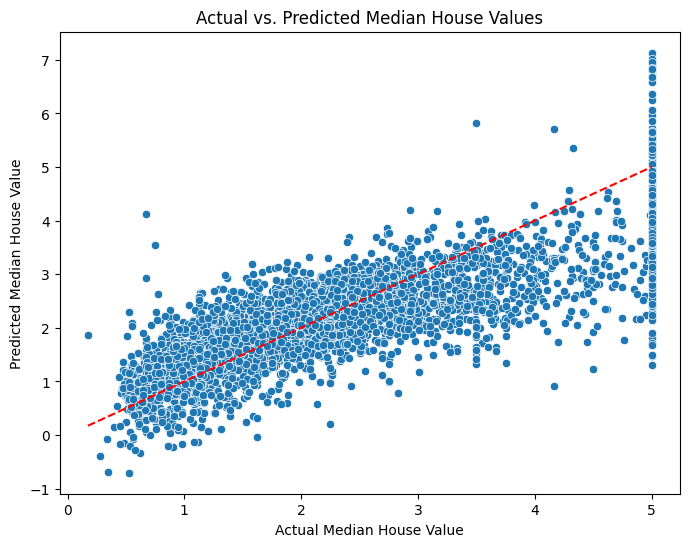

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ACTUAL', y='PRED', data=perf)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Values')
plt.plot([min(perf['ACTUAL']), max(perf['ACTUAL'])], [min(perf['ACTUAL']), max(perf['ACTUAL'])], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()

# **Predicting housing value with our model**

In [142]:
new_data = pd.DataFrame({'MedInc': [100], 'HouseAge': [df['HouseAge'].mean()], 'AveRooms': [df['AveRooms'].mean()],
                         'AveBedrms': [df['AveBedrms'].mean()], 'Population': [df['Population'].mean()],
                         'AveOccup': [df['AveOccup'].mean()], 'Latitude': [df['Latitude'].mean()],
                         'Longitude': [df['Longitude'].mean()]})

# Use the best model from the grid search to make the prediction
predicted_value = grid_search.predict(new_data)

print(f"Predicted Median House Value for an average income of $100,000: {predicted_value[0]}")


Predicted Median House Value for an average income of $100,000: 43.7343678187398


In [143]:
new_data = pd.DataFrame({'MedInc': [200], 'HouseAge': [df['HouseAge'].mean()], 'AveRooms': [df['AveRooms'].mean()],
                         'AveBedrms': [df['AveBedrms'].mean()], 'Population': [df['Population'].mean()],
                         'AveOccup': [df['AveOccup'].mean()], 'Latitude': [df['Latitude'].mean()],
                         'Longitude': [df['Longitude'].mean()]})

# Use the best model from the grid search to make the prediction
predicted_value = grid_search.predict(new_data)

print(f"Predicted Median House Value for an average income of $100,000: {predicted_value[0]}")

Predicted Median House Value for an average income of $100,000: 87.08248249348183


In [144]:
#scoring the model
grid_search_score = grid_search.score(x_test,y_test)
print("Grid search score on test set:", grid_search_score)

Grid search score on test set: -0.5304460892018742
